<a href="https://colab.research.google.com/github/alayacruz/CynapticsInductions/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pdb
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets, transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
%matplotlib inline

## Visualizing the data

In [ ]:
def show(tensor,ch=1, size=(28,28), num=16):
  data=tensor.detach().cpu().view(-1,ch,*size)
  grid=make_grid(data[:num],nrow=4).permute(1,2,0)

  plt.imshow(grid)
  plt.show()



In [ ]:
epoch=500
cur_iter=0 #counter keep track of current iteration
info_iter=300 #interval between log progress
mean_gen_loss=0
mean_disc_loss=0

z_dim=64
lr=0.0001 #learning rate for optimizer
loss=nn.BCEWithLogitsLoss()
batch_size=128
device="cuda"


In [ ]:
dataloader=DataLoader(MNIST('.',download=True,transform=transforms.ToTensor()),batch_size=batch_size,shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.9MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 431kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.05MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.91MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



# generator

In [ ]:
def genBlock(inp_nodes,out_nodes):
    return nn.Sequential(
        nn.Linear(inp_nodes,out_nodes),
        nn.BatchNorm1d(out_nodes),
        nn.ReLU()
    )

In [ ]:
def gen_noise(batch_size,z_dim):
    return torch.randn(batch_size,z_dim).to(device)


In [ ]:
class Generator(nn.Module):
  def __init__(self,z_dim=64,o_dim=784,h_dim=128):
    super().__init__()

    self.gen=nn.Sequential(
        genBlock(z_dim,h_dim),
        genBlock(h_dim,h_dim*2),
        genBlock(h_dim*2,h_dim*4),
        genBlock(h_dim*4,h_dim*8),
        nn.Linear(h_dim*8,o_dim),
        nn.Sigmoid(),

    )
  def forward(self,noise):
      return self.gen(noise)


# discriminator

In [ ]:
def discblock(inp_nodes,out_nodes):
    return nn.Sequential(
        nn.Linear(inp_nodes,out_nodes),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.2)
    )


In [ ]:
class Discriminator(nn.Module):
  def __init__(self,inp_dim=784,hidden_dim=128):
    super().__init__()

    self.disc=nn.Sequential(
        discblock(inp_dim,hidden_dim*5),
        discblock(hidden_dim*5,hidden_dim*3),
        discblock(hidden_dim*3,hidden_dim),
        nn.Linear(hidden_dim,1),

    )
  def forward(self,image):
     return self.disc(image)


In [ ]:
gen=Generator(z_dim).to(device)
gen_opt=torch.optim.RMSprop(gen.parameters(),lr=0.0002)
disc=Discriminator().to(device)
disc_opt=torch.optim.RMSprop(disc.parameters(),lr=lr)

# calculation of loss

In [ ]:
def gen_loss(loss_func,gen,disc,batch_size,z_dim):
  noise=gen_noise(batch_size,z_dim)
  fake=gen(noise)
  pred=disc(fake)
  target=torch.ones_like(pred)
  return loss_func(pred,target)

In [ ]:
def disc_loss(loss_func,disc,gen,batch_size,z_dim,real):
  noise=gen_noise(batch_size,z_dim)
  fake=gen(noise)
  disc_fake=disc(fake.detach())
  disc_fake_target=torch.zeros_like(disc_fake)+0.1
  disc_fake_loss=loss_func(disc_fake,disc_fake_target)

  disc_real=disc(real)
  disc_real_target=torch.ones_like(disc_real)-0.1
  disc_real_loss=loss_func(disc_real,disc_real_target)

  return(disc_fake_loss+disc_real_loss)/2


# Main Training Loop

works


  0%|          | 0/469 [00:00<?, ?it/s]

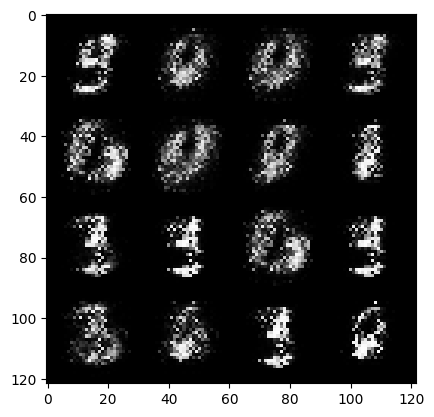

0 : step 300, Generator loss : 1.1441539593537653, Discriminator Loss : 0.5584101320306457
works


  0%|          | 0/469 [00:00<?, ?it/s]

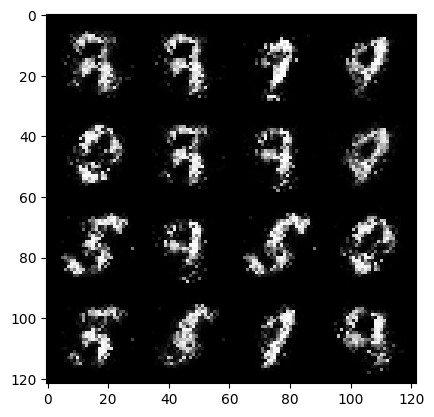

1 : step 600, Generator loss : 1.1810464237133647, Discriminator Loss : 0.5730169957876207


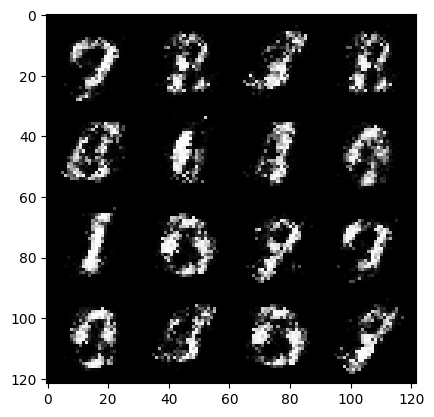

1 : step 900, Generator loss : 1.1530207403500878, Discriminator Loss : 0.5809265611569089
works


  0%|          | 0/469 [00:00<?, ?it/s]

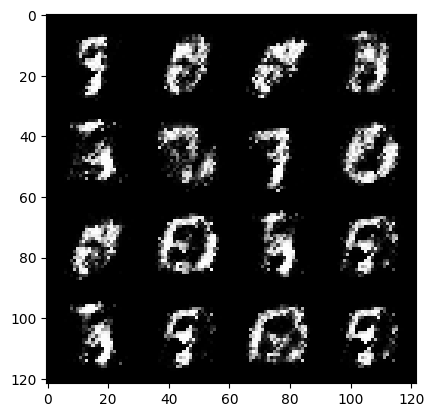

2 : step 1200, Generator loss : 1.1020874390999482, Discriminator Loss : 0.5995558617512383
works


  0%|          | 0/469 [00:00<?, ?it/s]

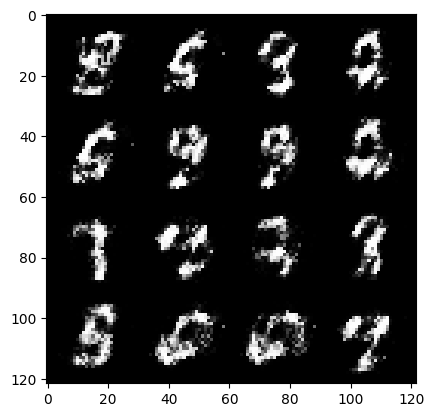

3 : step 1500, Generator loss : 1.0645906118551896, Discriminator Loss : 0.6070586218436553


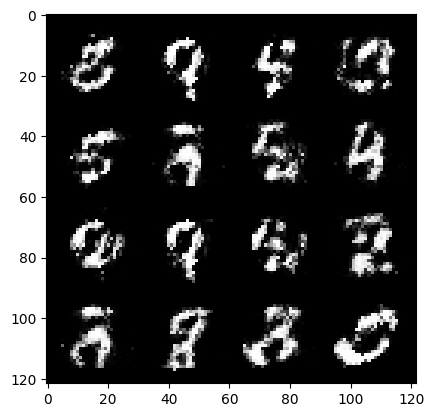

3 : step 1800, Generator loss : 1.0755627799034115, Discriminator Loss : 0.6051935342947645
works


  0%|          | 0/469 [00:00<?, ?it/s]

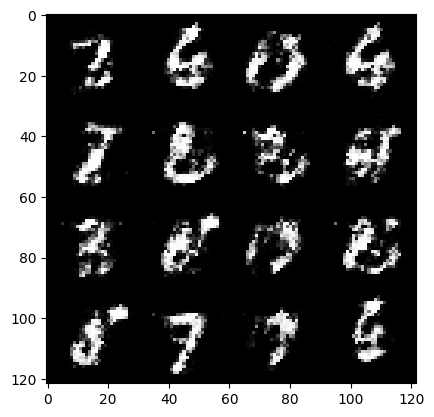

4 : step 2100, Generator loss : 1.0540227534373605, Discriminator Loss : 0.6110317389170331
works


  0%|          | 0/469 [00:00<?, ?it/s]

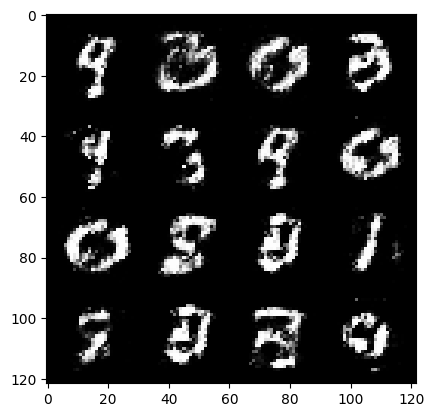

5 : step 2400, Generator loss : 1.0363578913609182, Discriminator Loss : 0.6150472436348603


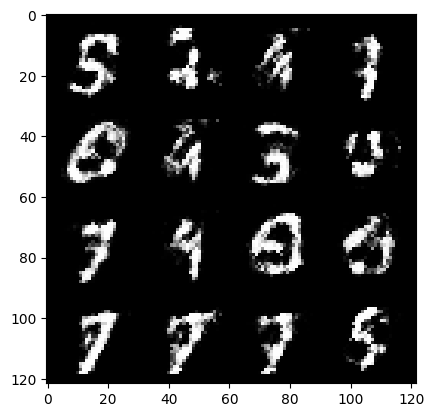

5 : step 2700, Generator loss : 1.0407563638687132, Discriminator Loss : 0.6135122676690415
works


  0%|          | 0/469 [00:00<?, ?it/s]

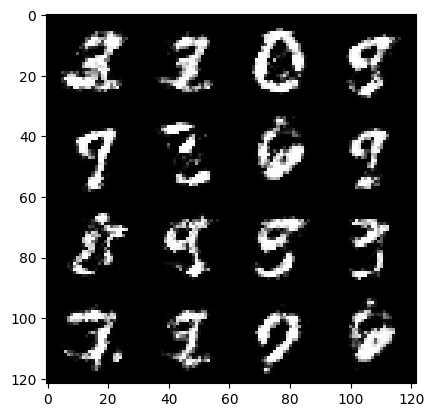

6 : step 3000, Generator loss : 1.0265326633055998, Discriminator Loss : 0.6141734196742374
works


  0%|          | 0/469 [00:00<?, ?it/s]

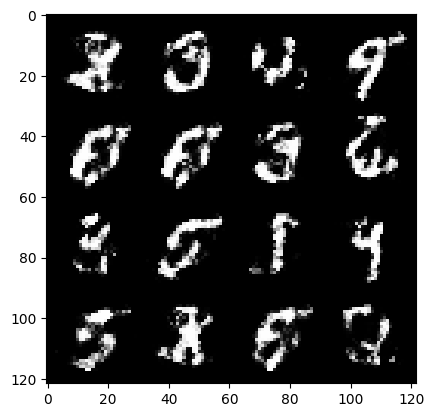

7 : step 3300, Generator loss : 1.0360707861185072, Discriminator Loss : 0.6139155018329622


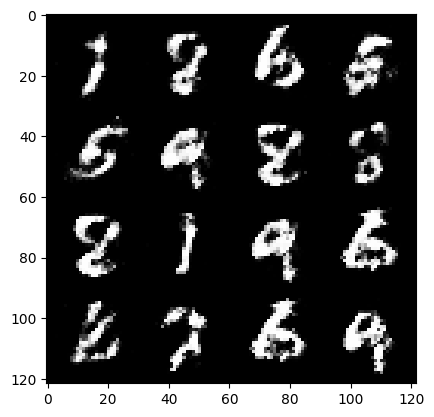

7 : step 3600, Generator loss : 0.9858026627699533, Discriminator Loss : 0.6263244050741195
works


  0%|          | 0/469 [00:00<?, ?it/s]

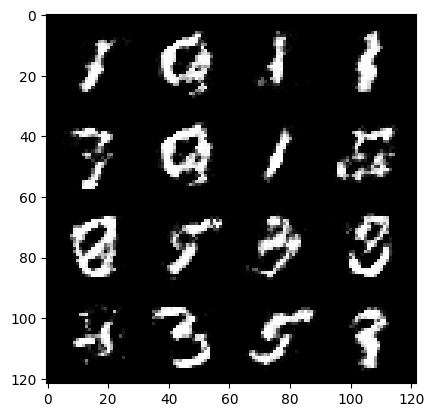

8 : step 3900, Generator loss : 0.9434292290608086, Discriminator Loss : 0.6371341945727669


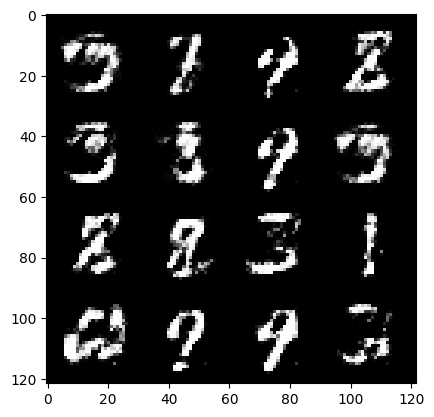

8 : step 4200, Generator loss : 0.9358412734667461, Discriminator Loss : 0.6391262608766557
works


  0%|          | 0/469 [00:00<?, ?it/s]

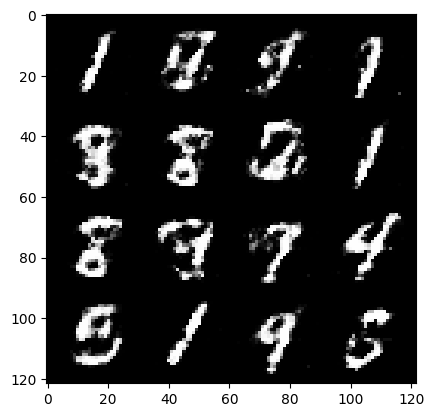

9 : step 4500, Generator loss : 0.9214915647109349, Discriminator Loss : 0.6417074064413704
works


  0%|          | 0/469 [00:00<?, ?it/s]

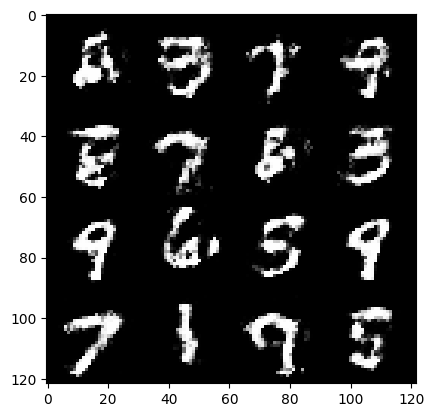

10 : step 4800, Generator loss : 0.9093487538894017, Discriminator Loss : 0.6442542688051864


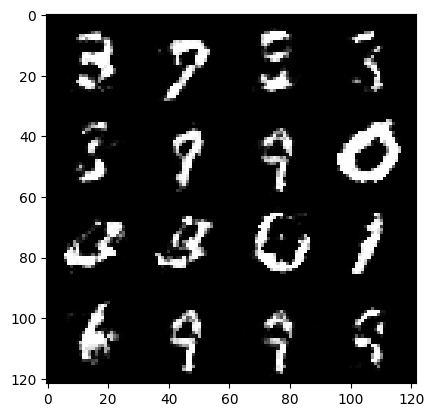

10 : step 5100, Generator loss : 0.916293667554855, Discriminator Loss : 0.6405891442298891
works


  0%|          | 0/469 [00:00<?, ?it/s]

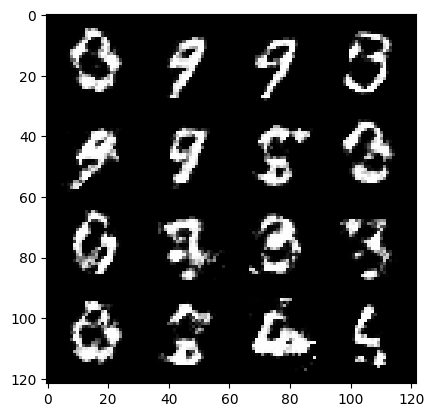

11 : step 5400, Generator loss : 0.8938545169432955, Discriminator Loss : 0.6471520117918651
works


  0%|          | 0/469 [00:00<?, ?it/s]

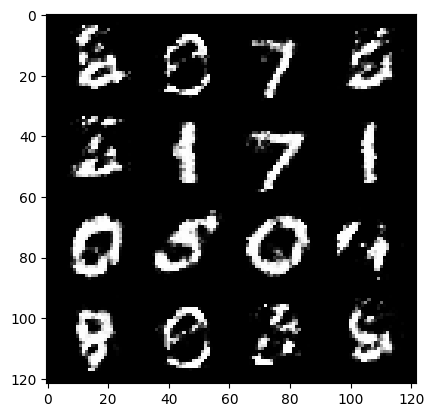

12 : step 5700, Generator loss : 0.9084455792109175, Discriminator Loss : 0.6417852429548898


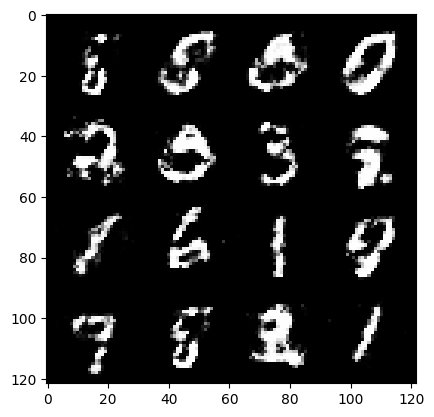

12 : step 6000, Generator loss : 0.8940632714827852, Discriminator Loss : 0.6462283017237979
works


  0%|          | 0/469 [00:00<?, ?it/s]

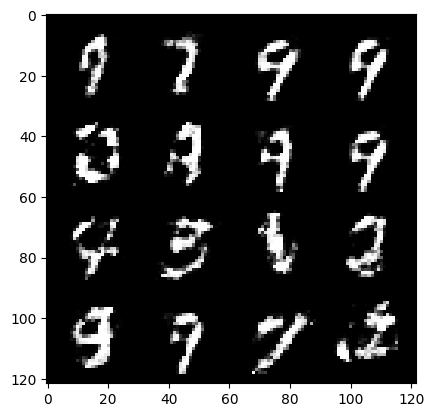

13 : step 6300, Generator loss : 0.8886102135976154, Discriminator Loss : 0.6459751784801487
works


  0%|          | 0/469 [00:00<?, ?it/s]

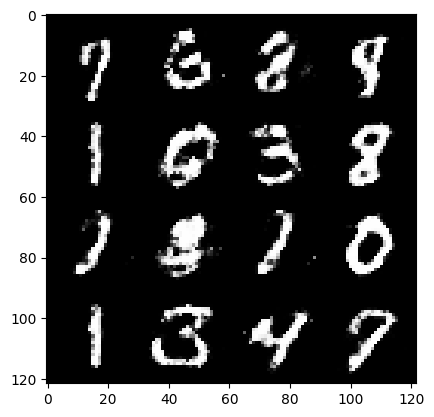

14 : step 6600, Generator loss : 0.878548699816068, Discriminator Loss : 0.6485537097851434


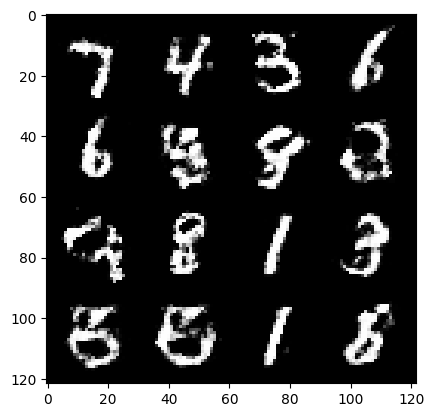

14 : step 6900, Generator loss : 0.8693145910898847, Discriminator Loss : 0.6513118573029836
works


  0%|          | 0/469 [00:00<?, ?it/s]

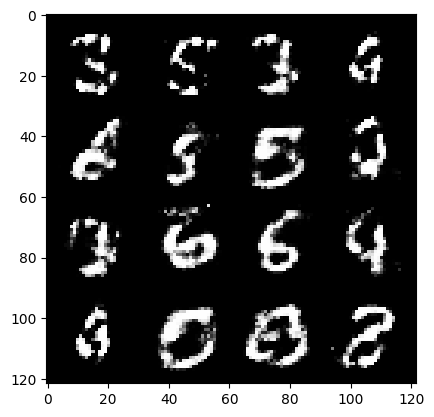

15 : step 7200, Generator loss : 0.8824846792221072, Discriminator Loss : 0.6466575376192732


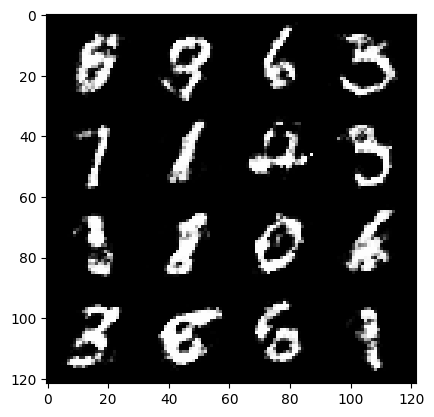

15 : step 7500, Generator loss : 0.8805267286300668, Discriminator Loss : 0.6467123349507651
works


  0%|          | 0/469 [00:00<?, ?it/s]

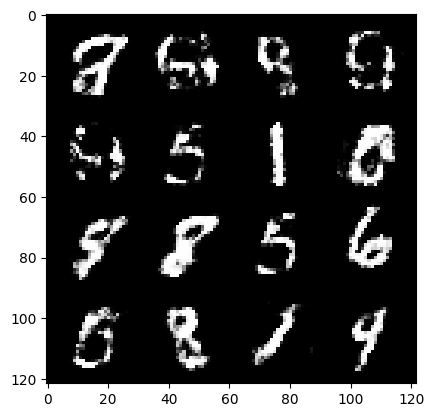

16 : step 7800, Generator loss : 0.8793596369028097, Discriminator Loss : 0.649101077914238
works


  0%|          | 0/469 [00:00<?, ?it/s]

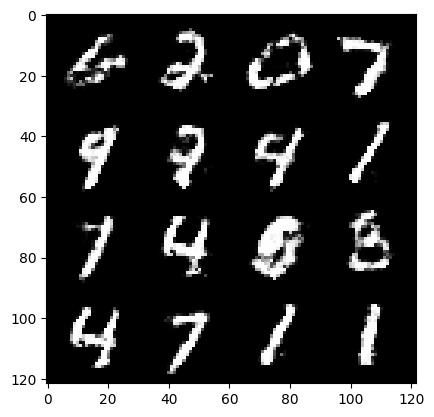

17 : step 8100, Generator loss : 0.8680097520351405, Discriminator Loss : 0.648352716763815


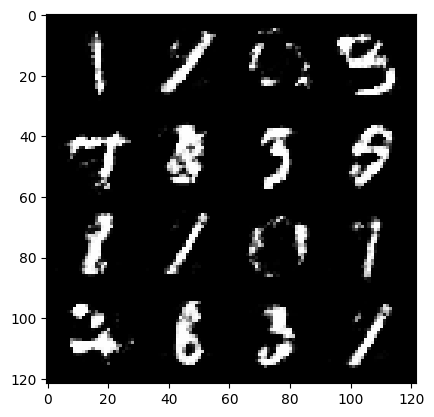

17 : step 8400, Generator loss : 0.8834681687752394, Discriminator Loss : 0.645713731249174
works


  0%|          | 0/469 [00:00<?, ?it/s]

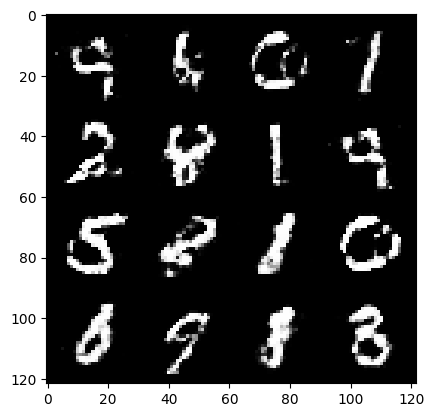

18 : step 8700, Generator loss : 0.8893697796265281, Discriminator Loss : 0.6427228389183682
works


  0%|          | 0/469 [00:00<?, ?it/s]

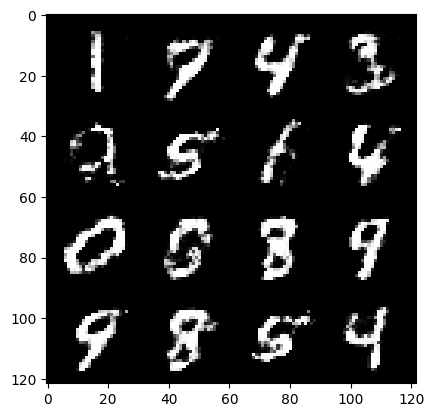

19 : step 9000, Generator loss : 0.8872893180449797, Discriminator Loss : 0.6455408680438999


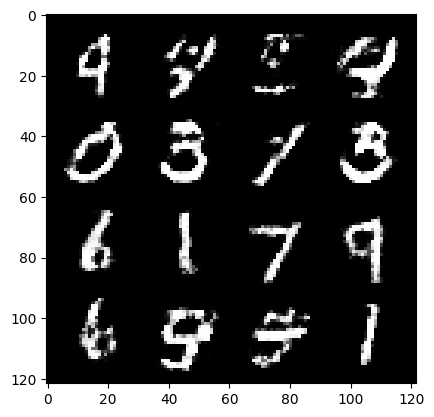

19 : step 9300, Generator loss : 0.8816562624772392, Discriminator Loss : 0.6446260128418607
works


  0%|          | 0/469 [00:00<?, ?it/s]

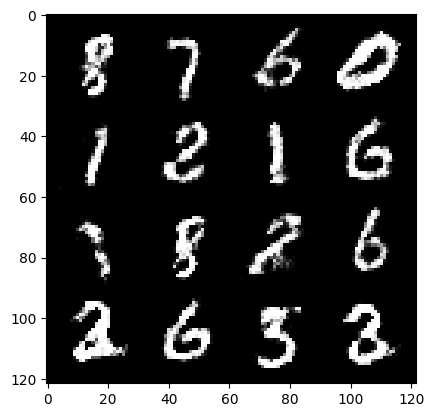

20 : step 9600, Generator loss : 0.8994533210992812, Discriminator Loss : 0.6416707585255307
works


  0%|          | 0/469 [00:00<?, ?it/s]

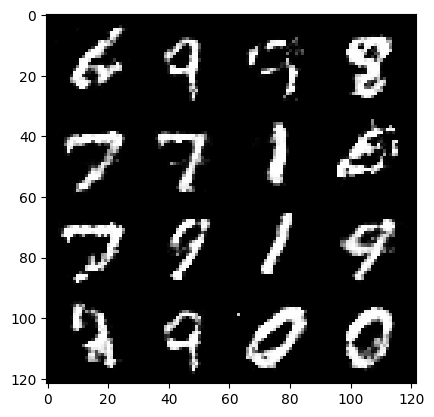

21 : step 9900, Generator loss : 0.8882724573214847, Discriminator Loss : 0.6429058325290682


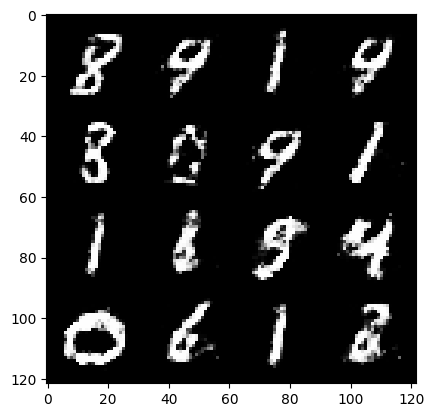

21 : step 10200, Generator loss : 0.8876306581497192, Discriminator Loss : 0.642288249731064
works


  0%|          | 0/469 [00:00<?, ?it/s]

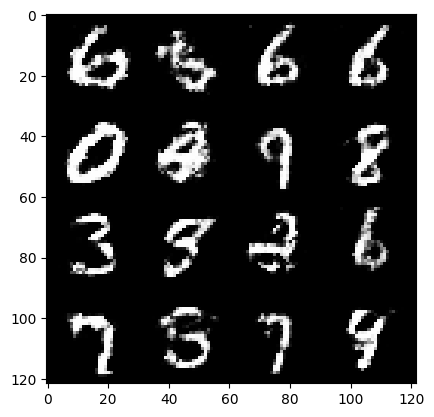

22 : step 10500, Generator loss : 0.9028964575131726, Discriminator Loss : 0.6398843862613042
works


  0%|          | 0/469 [00:00<?, ?it/s]

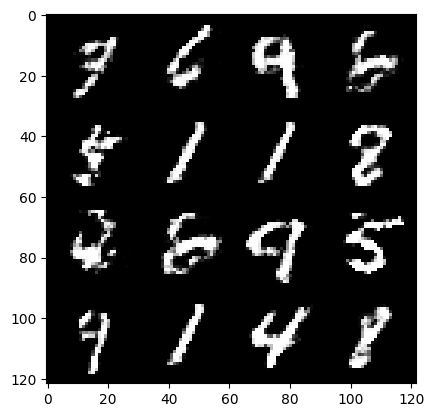

23 : step 10800, Generator loss : 0.911291470527649, Discriminator Loss : 0.6359829330444334


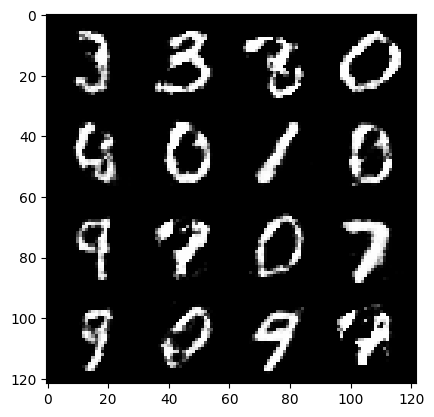

23 : step 11100, Generator loss : 0.9057890446980799, Discriminator Loss : 0.6388213409980138
works


  0%|          | 0/469 [00:00<?, ?it/s]

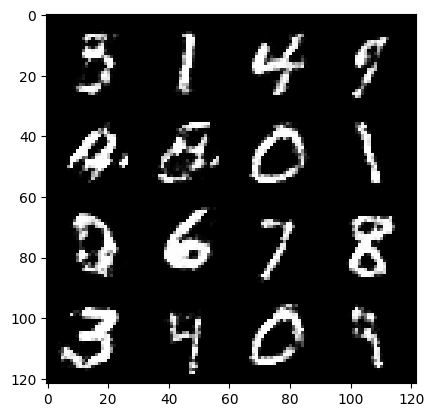

24 : step 11400, Generator loss : 0.9080397073427839, Discriminator Loss : 0.6374723758300145


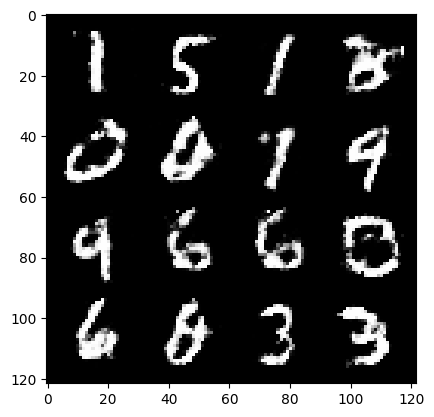

24 : step 11700, Generator loss : 0.9232582976420715, Discriminator Loss : 0.6346384100119276
works


  0%|          | 0/469 [00:00<?, ?it/s]

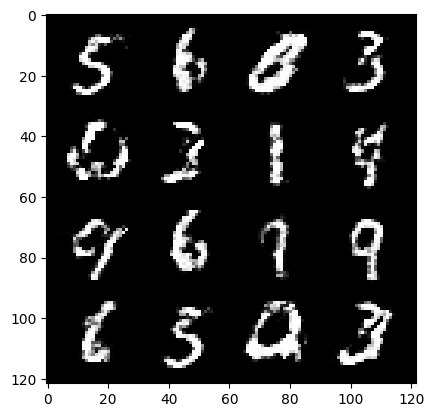

25 : step 12000, Generator loss : 0.9118875845273339, Discriminator Loss : 0.6356606821219127
works


  0%|          | 0/469 [00:00<?, ?it/s]

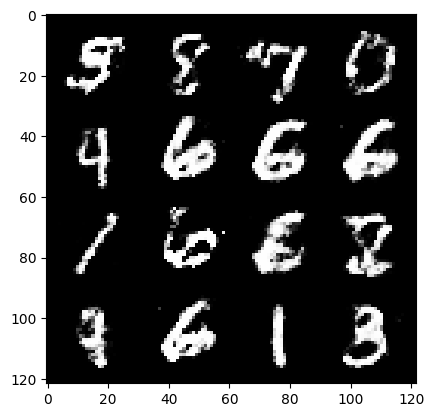

26 : step 12300, Generator loss : 0.9149332940578458, Discriminator Loss : 0.6354715051253637


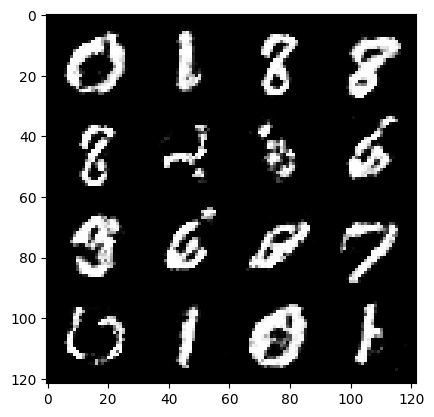

26 : step 12600, Generator loss : 0.924114602208138, Discriminator Loss : 0.6338804652293518
works


  0%|          | 0/469 [00:00<?, ?it/s]

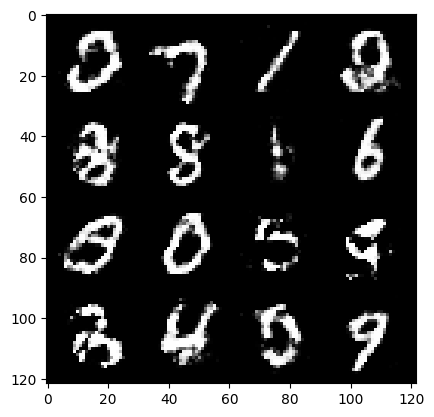

27 : step 12900, Generator loss : 0.9211485958099362, Discriminator Loss : 0.6338372313976285
works


  0%|          | 0/469 [00:00<?, ?it/s]

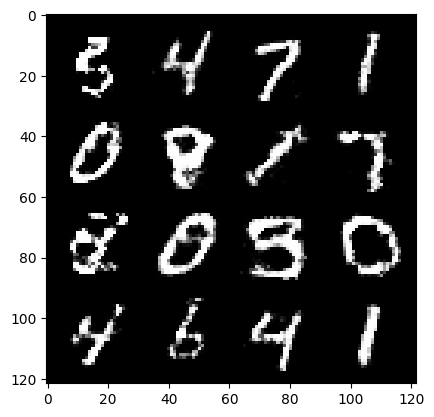

28 : step 13200, Generator loss : 0.9240934854745873, Discriminator Loss : 0.6343205581108731


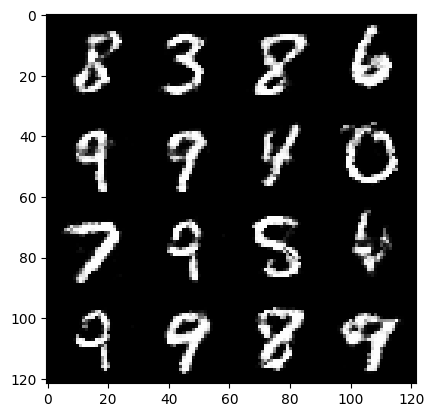

28 : step 13500, Generator loss : 0.9214347386360168, Discriminator Loss : 0.6352388445536297
works


  0%|          | 0/469 [00:00<?, ?it/s]

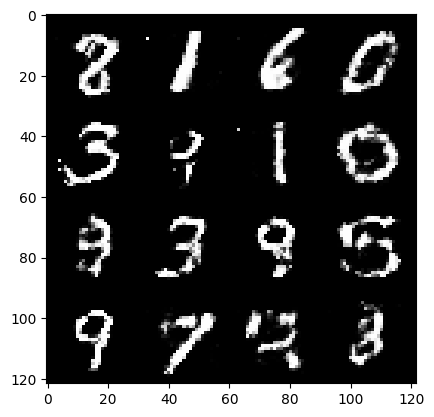

29 : step 13800, Generator loss : 0.9202805391947435, Discriminator Loss : 0.6343419841925305
works


  0%|          | 0/469 [00:00<?, ?it/s]

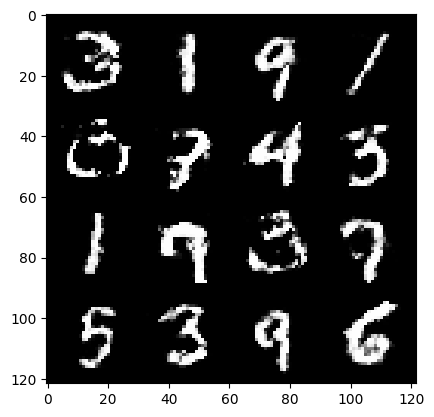

30 : step 14100, Generator loss : 0.9318451585372288, Discriminator Loss : 0.6289989805221557


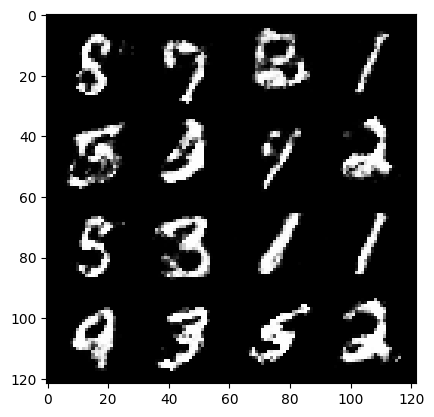

30 : step 14400, Generator loss : 0.9556804227828973, Discriminator Loss : 0.6248426045974095
works


  0%|          | 0/469 [00:00<?, ?it/s]

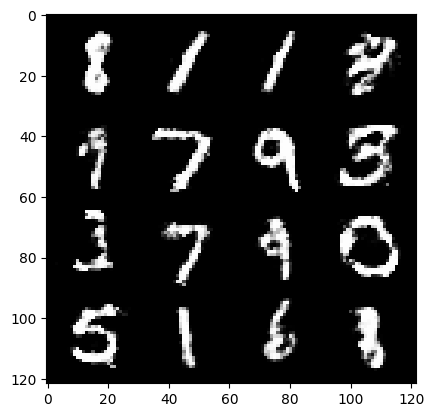

31 : step 14700, Generator loss : 0.9289493733644487, Discriminator Loss : 0.6310532474517823


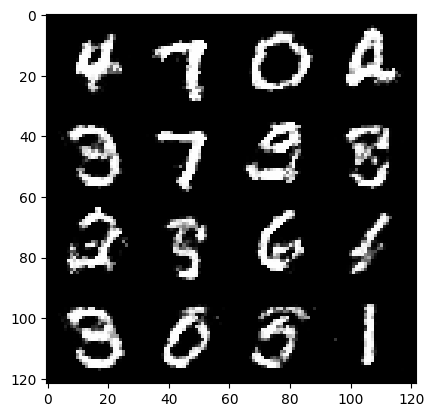

31 : step 15000, Generator loss : 0.9386578114827476, Discriminator Loss : 0.6290424787998202
works


  0%|          | 0/469 [00:00<?, ?it/s]

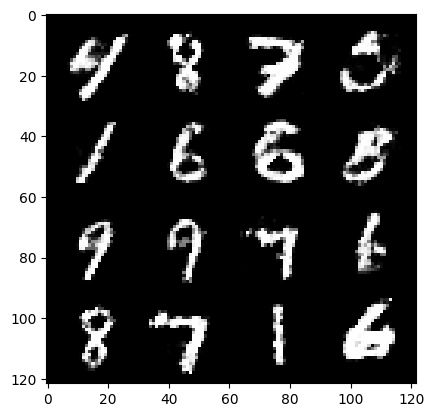

32 : step 15300, Generator loss : 0.9290995403130847, Discriminator Loss : 0.6302792984247211
works


  0%|          | 0/469 [00:00<?, ?it/s]

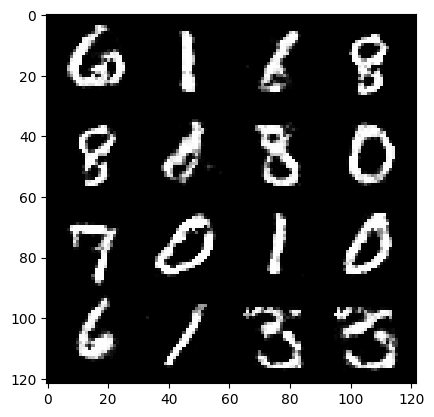

33 : step 15600, Generator loss : 0.938501370549202, Discriminator Loss : 0.629351145823796


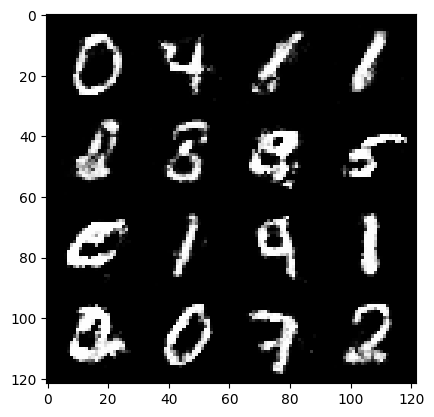

33 : step 15900, Generator loss : 0.9344329222043347, Discriminator Loss : 0.6306680289904281
works


  0%|          | 0/469 [00:00<?, ?it/s]

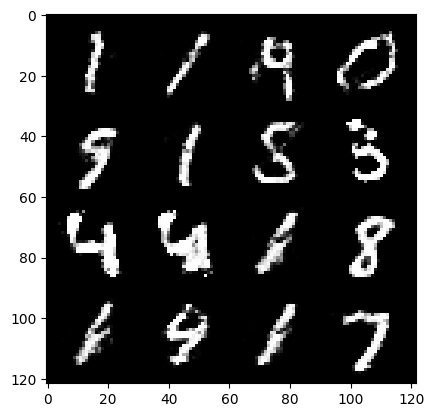

34 : step 16200, Generator loss : 0.9370488955577214, Discriminator Loss : 0.6285727202892306
works


  0%|          | 0/469 [00:00<?, ?it/s]

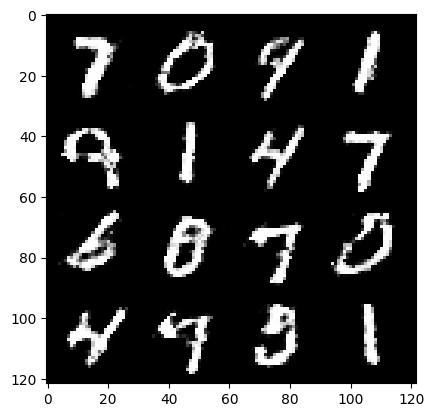

35 : step 16500, Generator loss : 0.9402947396039962, Discriminator Loss : 0.6287082825104394


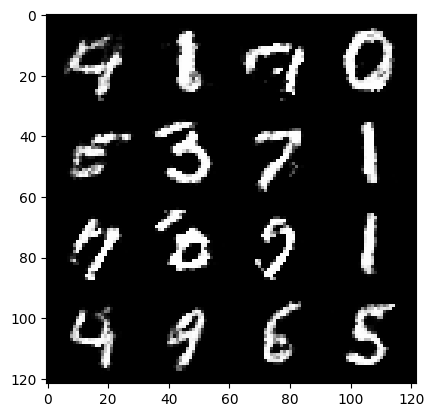

35 : step 16800, Generator loss : 0.9459978610277183, Discriminator Loss : 0.6276013427972797
works


  0%|          | 0/469 [00:00<?, ?it/s]

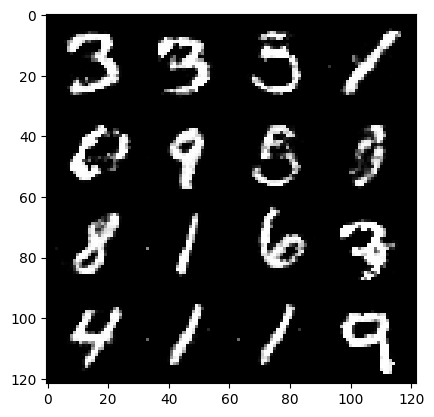

36 : step 17100, Generator loss : 0.9467108615239449, Discriminator Loss : 0.6269106572866437


KeyboardInterrupt: 

In [ ]:
for epoch in range(epoch):
  print('works')
  mean_disc_loss_list=[]
  mean_gen_loss_list=[]
  iters_list=[]

  for real_image, _ in tqdm(dataloader):
    disc_opt.zero_grad()
    cur_batch_size=len(real_image)
    real_image=real_image.view(cur_batch_size,-1).to(device )
    disc_losses=disc_loss(loss,disc,gen,cur_batch_size,z_dim,real_image)
    disc_losses.backward()
    disc_opt.step()

    gen_opt.zero_grad()
    gen_losses=gen_loss(loss,gen,disc,cur_batch_size,z_dim)
    gen_losses.backward()
    gen_opt.step()

    mean_disc_loss += disc_losses.item()/info_iter
    mean_gen_loss += gen_losses.item()/info_iter
    mean_disc_loss_list.append(mean_disc_loss)
    mean_gen_loss_list.append(mean_gen_loss)


    if(cur_iter%info_iter==0 and cur_iter>0):
      fake_noise=gen_noise(batch_size,z_dim)
      fake=gen(fake_noise)
      #show(real_image)
      show(fake)
      print(f"{epoch} : step {cur_iter}, Generator loss : {mean_gen_loss}, Discriminator Loss : {mean_disc_loss}")
      mean_gen_loss, mean_disc_loss = 0, 0

    iters_list.append(cur_iter)
    cur_iter+=1

